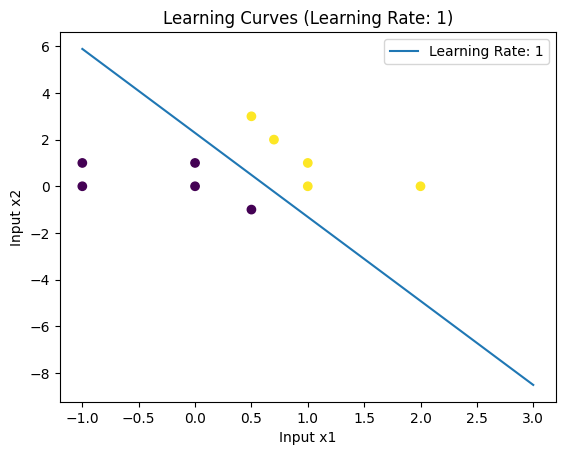

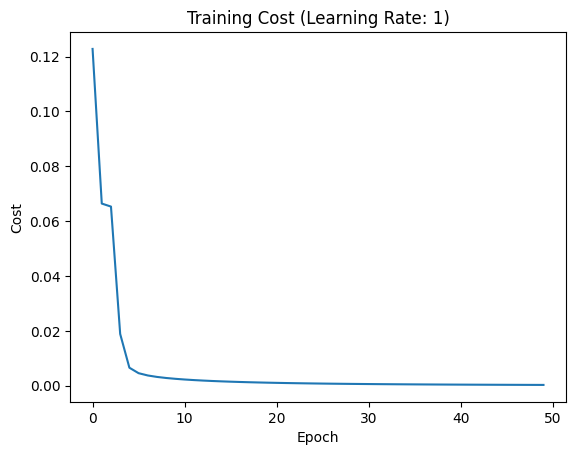

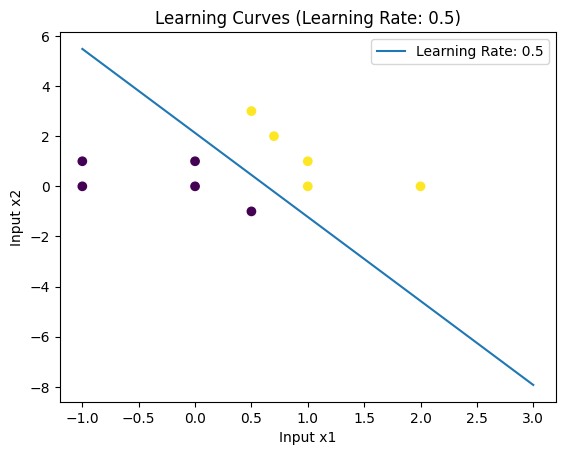

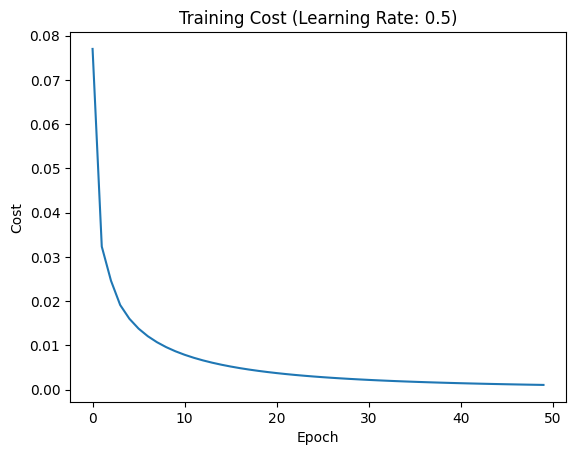

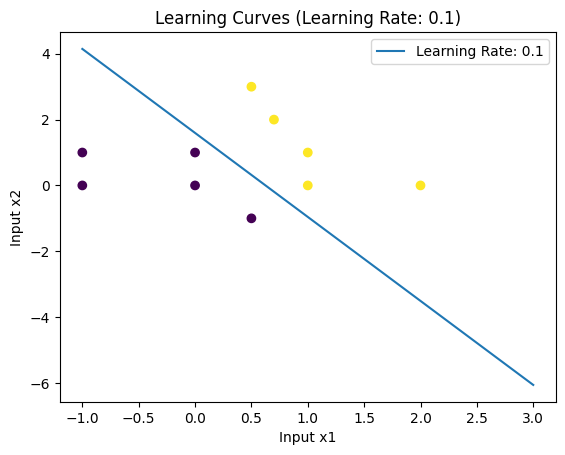

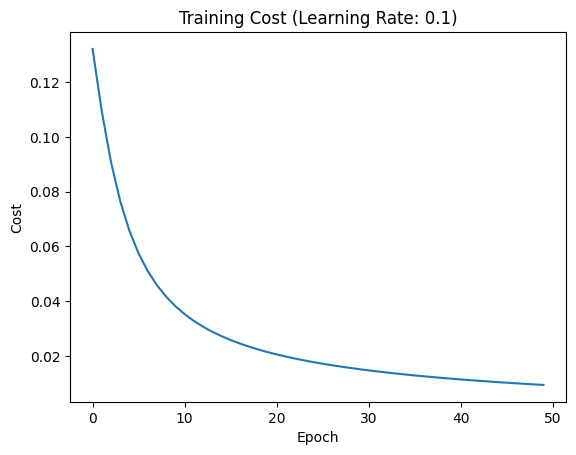

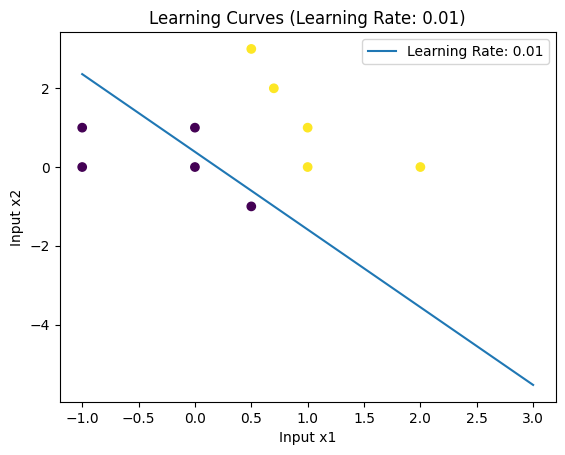

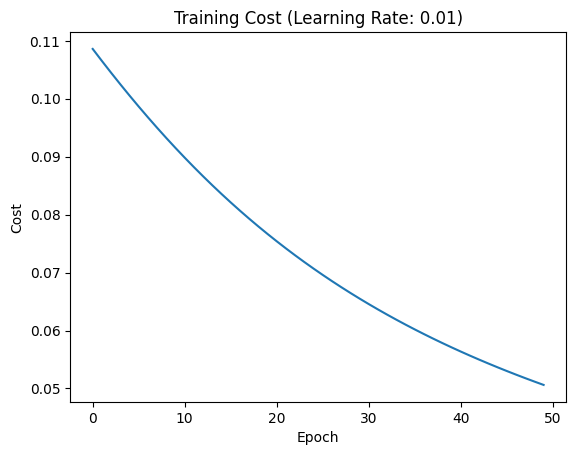

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.random.rand(3, 1)  # Initialize 3x1 weight vector
        self.learning_rate = learning_rate
        self.history = {'weights': [], 'cost': []}  # Track weights and cost

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward_propagation(self, inputs):
        z = np.dot(inputs, self.weights)  # Linear combination
        output = self.sigmoid(z)
        return output

    def train(self, inputs_train, labels_train, num_train_iterations):
        for epoch in range(num_train_iterations):
            # Forward propagation
            outputs = self.forward_propagation(inputs_train)

            # Calculate cost (mean squared error)
            cost = np.mean(0.5 * (labels_train - outputs) ** 2)
            self.history['cost'].append(cost)

            # Backpropagation
            error = outputs - labels_train
            delta_weights = np.dot(inputs_train.T, error) * self.learning_rate

            # Update weights
            self.weights -= delta_weights

            # Track weights for visualization
            self.history['weights'].append(self.weights.copy())

# Data
inputs = np.array([
    [1, 1],
    [1, 0],
    [0, 1],
    [0.5,-1],
    [0.5,3],
    [0.7,2],
    [-1,0],
    [-1,1],
    [2,0],
    [0,0],
])
labels = np.array([
    [1],
    [1],
    [0],
    [0],
    [1],
    [1],
    [0],
    [0],
    [1],
    [0],
])

# Add bias term
inputs = np.concatenate((inputs, np.ones((10, 1))), axis=1)  # Shape: 10x3

# Learning Rates
learning_rates = [1, 0.5, 0.1, 0.01]

# Train and plot for each learning rate
for learning_rate in learning_rates:
    # Create network and train
    network = NeuralNetwork(learning_rate)
    network.train(inputs, labels, 50)

    # Plot data points
    plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, cmap='viridis')  # Different markers

    # Get final weights and bias
    weights = network.history['weights'][-1].squeeze()  # Extract final weights
    bias = weights[-1]
    w1, w2 = weights[:-1]  # Extract w1 and w2

    # Decision boundary equation (y = mx + b)
    x = np.linspace(-1, 3)
    y = -(w1 * x + bias) / w2

    # Plot decision boundary and training cost
    plt.plot(x, y, label=f'Learning Rate: {learning_rate}')
    plt.title(f'Learning Curves (Learning Rate: {learning_rate})')
    plt.xlabel('Input x1')
    plt.ylabel('Input x2')
    plt.legend()
    plt.show()

    # Plot training cost (learning curve)
    plt.plot(network.history['cost'])
    plt.title(f'Training Cost (Learning Rate: {learning_rate})')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.show()

#f. As the learning rate decrease the learning curve becomes less and less steep.  Learning rate .001 is most suitable because it has the least training cost.